# TSNE Grid Plotter

This notebook takes in a list of embedded 3D waveforms with different TSNE hyperparameter combinations and data cleaning labels and outputs a grid of 3D plots. First, we load modules and files.

In [6]:
import pickle, json
import numpy as np
import seaborn as sns
import lgdo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Load data 
dsp_file = "../data/train_data_dsp.h5"
sto = lgdo.lh5.LH5Store()
tb_dsp, _ = sto.read('detector/dsp', dsp_file)

with open("../data/tsne_grid_data.sav", 'rb') as plotter:
    tsne_plotter = pickle.load(plotter)

Here we define inputs and create a custom colormap for plotting.

In [7]:
labels = tb_dsp['dc_label'].nda

categories = ['Normal', 'Negative Going', 'Upwards Sloping', 'Downwards Sloping', 'Spike', 
              'Crosstalk', 'Slow Rise', 'Early Trigger', 'Late Trigger', 'Saturation',
              'Soft Pileup', 'Hard Pileup', 'Bump', 'Noise Trigger']
colors = ['blue', 'green', 'red', 'cyan', 'fuchsia', 
          'gold', 'indigo', 'grey', 'maroon', 'tab:orange',
          'hotpink', 'magenta', 'sienna', 'purple']
cmap = ListedColormap(colors)

Now we plot the grid of 3D embedded waveforms and save it as a .pdf file.

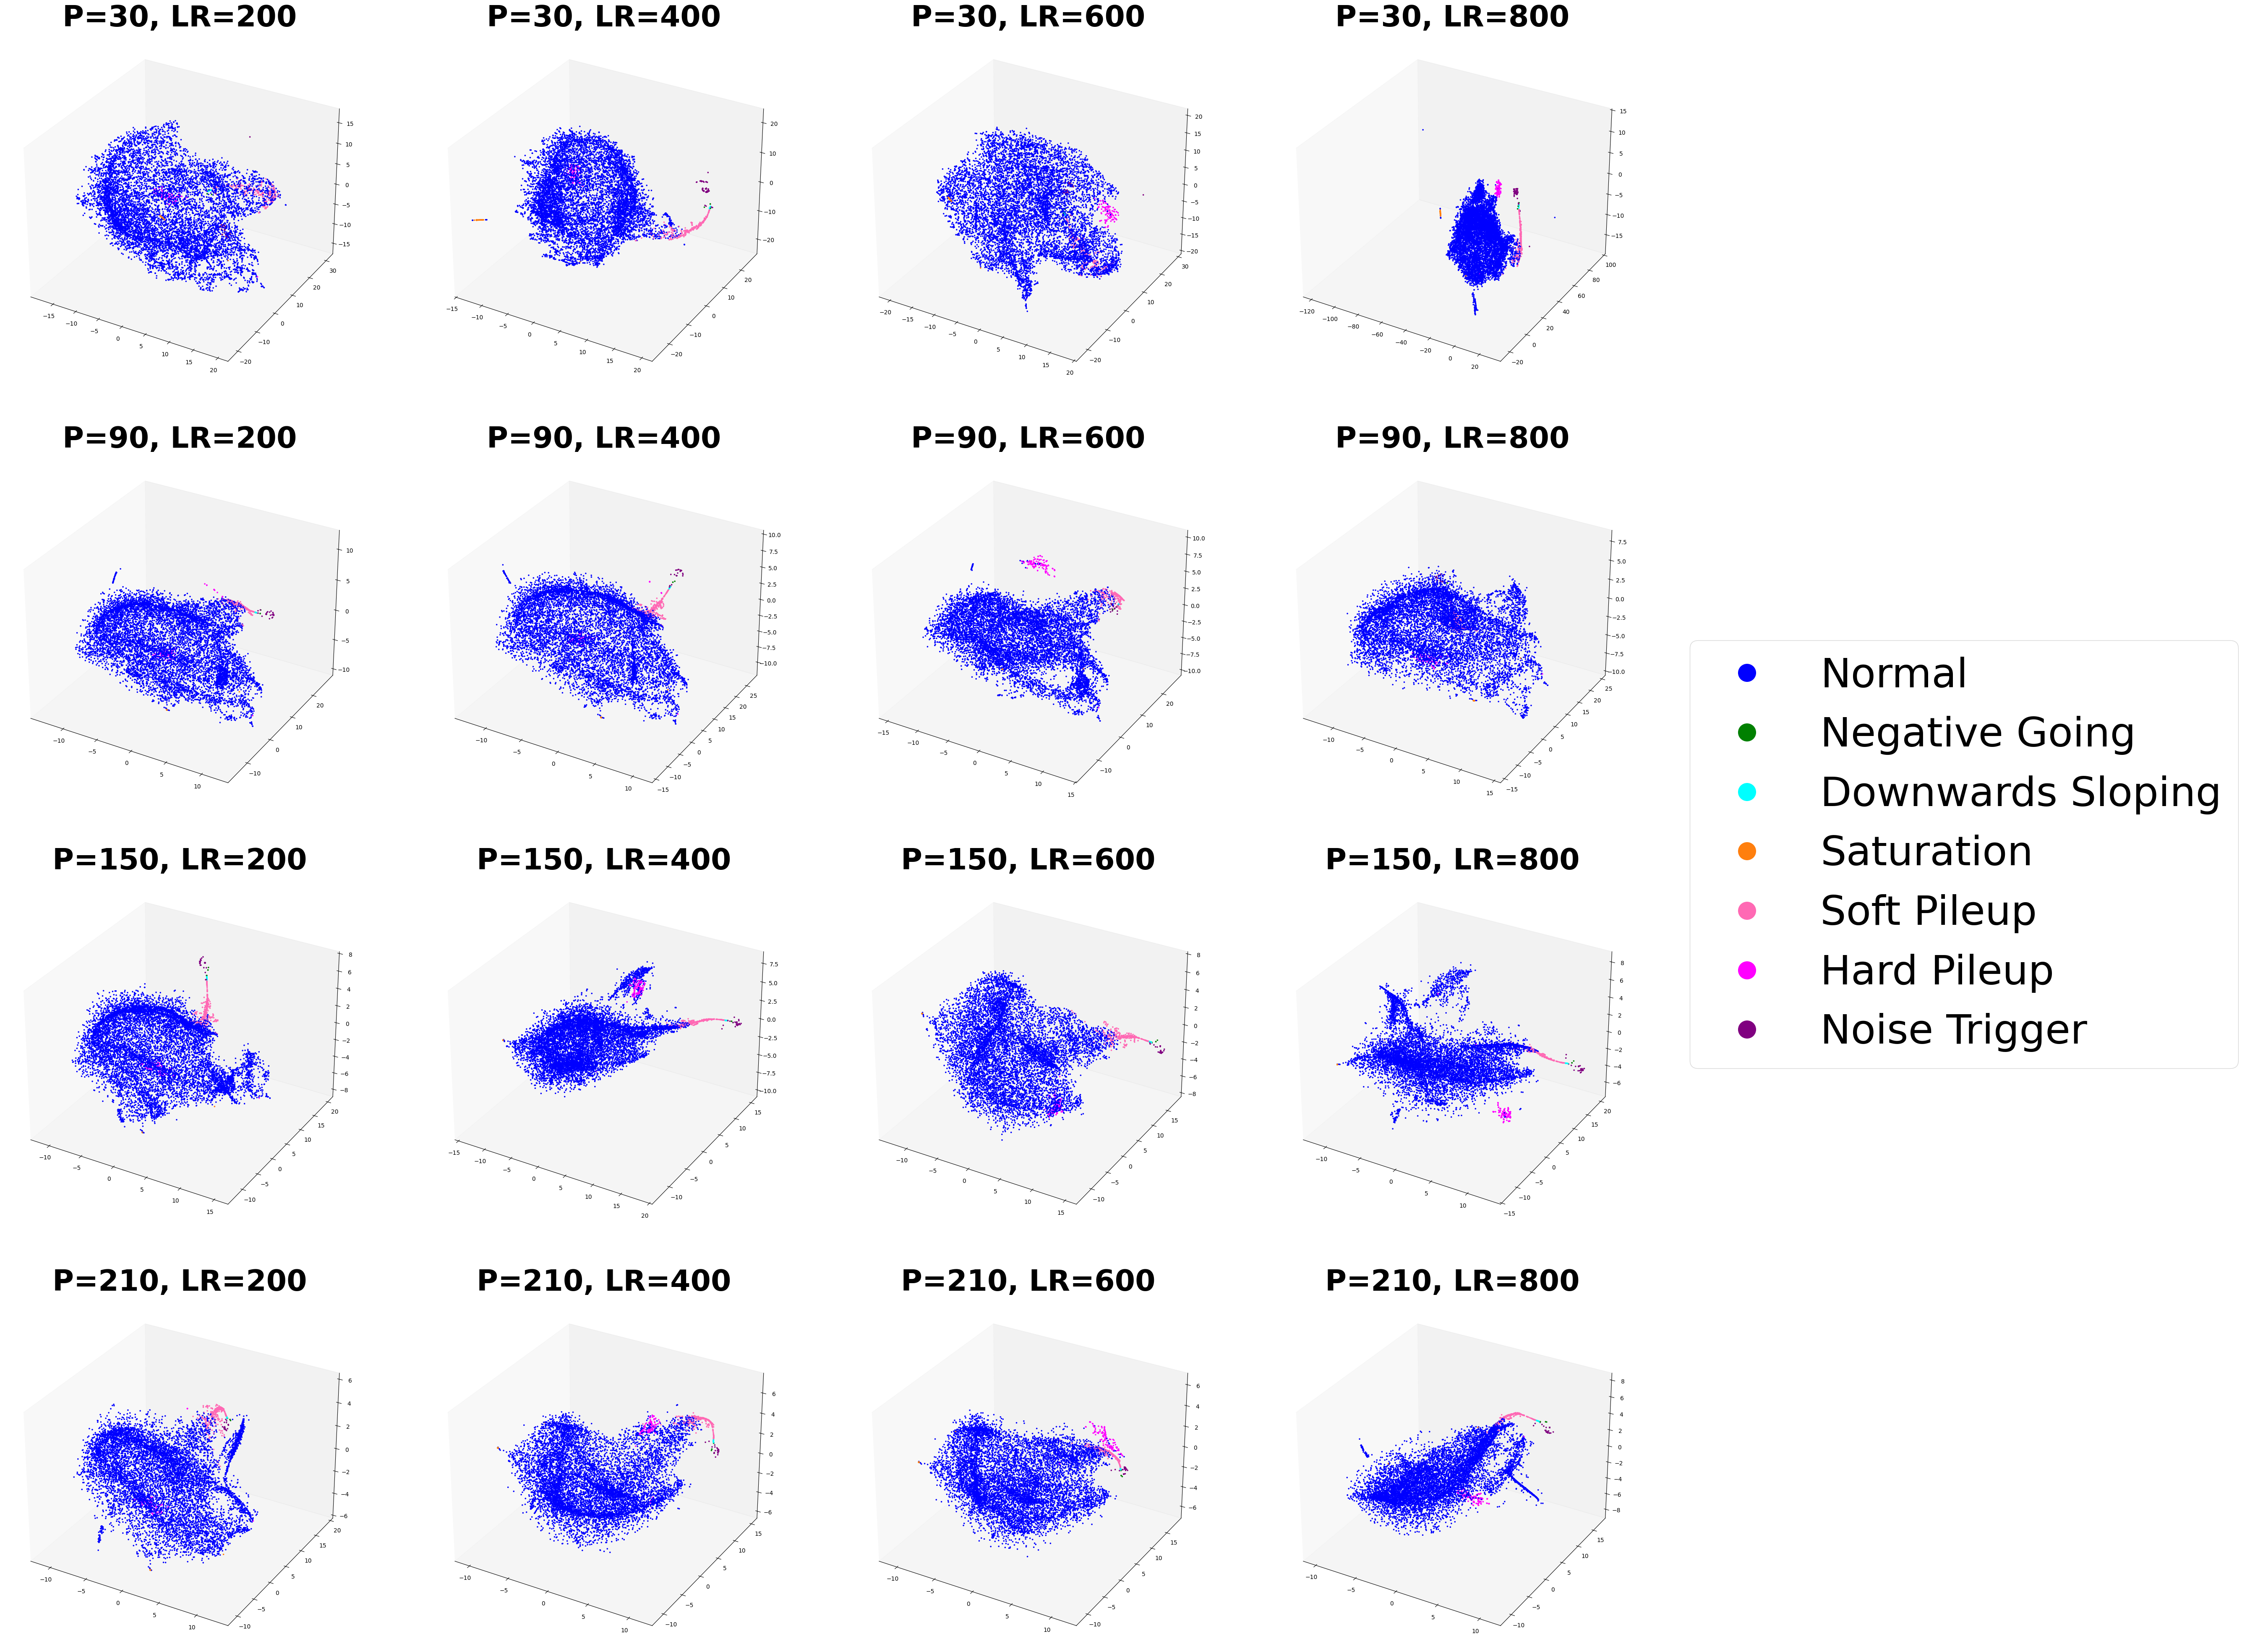

In [18]:
%matplotlib inline

perplex_range            = [30,90,150,210]
learning_rate_range      = [200,400,600,800]

fig = plt.figure(figsize=(50, 50))
for k, (p, lr, dwts_norm_3d) in enumerate(tsne_plotter):

    ax = plt.subplot(len(perplex_range), len(learning_rate_range) , k + 1, projection='3d')
    ax.set_title("P=%d, LR=%d" % (p, lr), size=50, fontweight='bold')
    ax.grid(False)
    scatter = ax.scatter3D(dwts_norm_3d[:, 0], dwts_norm_3d[:, 1], dwts_norm_3d[:, 2],
                           c=labels, cmap=cmap, label=labels,
                           edgecolors=None, marker='.', s=10, alpha=1)

handles = scatter.legend_elements()[0]
legend_labels = []

for i in list(set(labels)):
    legend_labels.append(categories[int(i)])

fig.legend(handles, legend_labels, fontsize=70, markerscale=5, bbox_to_anchor=(1.2,0.6))

file_name = 'tsne_grid'
file_format = 'pdf'
plt.savefig(f"{file_name}.{file_format}", 
            dpi=600, format=file_format, bbox_inches='tight')

Finally, we save the TSNE hyperparameters that give the best separation of clusters. The user must choose these based on the plot.

In [19]:
with open('../data/hyperparameters.json', 'r') as infile:
    hyperparams_dict = json.load(infile)
    
hyperparams_dict['TSNE_3D']['perplexity'] = str(150)
hyperparams_dict['TSNE_3D']['learning_rate'] = str(800)

In [20]:
with open("../data/hyperparameters_detector.json", "w") as outfile:
    json.dump(hyperparams_dict, outfile, indent=2)